In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers import ELU, PReLU, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
img_rows=28
img_cols=28
channels=1

img_shape = (img_rows,img_cols,channels)

zdim=100

In [ ]:
#movaled
def build_gen(img_shape,zdim):
    model = Sequential()
    model.add(Dense(128,input_dim=zdim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation='tanh'))
    model.add(Reshape(img_shape))
    return model

In [ ]:
#shabake_tafkik_konande
def build_dis(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [ ]:
def build_gan(gen,dis):
    model = Sequential()
    model.add(gen)
    model.add(dis)
    return model

In [ ]:
dis_v = build_dis(img_shape)
dis_v.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
gen_v = build_gen(img_shape,zdim)
dis_v.trainable=False
gan_v = build_gan(gen_v,dis_v)
gan_v.compile(loss='binary_crossentropy',
              optimizer=Adam()
             )

In [ ]:
losses=[]
accuracies=[]
iteration_checks=[]

In [ ]:
def train(iterations,batch_size,interval):

    (Xtrain, _),(_, _) = mnist.load_data()
    Xtrain = Xtrain/127.5 - 1.0
    Xtrain = np.expand_dims(Xtrain,axis=3)

    real = np.ones((batch_size,1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        ids = np.random.randint(0,Xtrain.shape[0],batch_size)
        imgs = Xtrain[ids]

        z=np.random.normal(0,1,(batch_size,100))
        gen_imgs = gen_v.predict(z)

        dloss_real = dis_v.train_on_batch(imgs,real)
        dloss_fake = dis_v.train_on_batch(gen_imgs, fake)

        dloss,accuracy = 0.5 * np.add(dloss_real,dloss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        gloss = gan_v.train_on_batch(z,real)

        if (iteration+1) % interval == 0:
            losses.append((dloss,gloss))
            accuracies.append(100.0*accuracy)
            iteration_checks.append(iteration+1)

            print("%d [D loss: %f , acc: %.2f] [G loss: %f]" %
                  (iteration+1,dloss,100.0*accuracy,gloss))
            show_images(gen_v)

In [ ]:
def show_images(gen):
    z = np.random.normal(0, 1, (16, 100))
    gen_imgs = gen.predict(z)
    gen_imgs = 0.5*gen_imgs + 0.5

    fig,axs = plt.subplots(4,4,figsize=(4,4),sharey=True,sharex=True)

    cnt=0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt,:,:,0],cmap='gray')
            axs[i, j].axis('off')
            cnt+=1

    fig.show()

4/4 [==============================] - 0s 4ms/step
100 [D loss: 0.005106 , acc: 100.00] [G loss: 4.647714]
4/4 [==============================] - 0s 4ms/step
200 [D loss: 0.005221 , acc: 100.00] [G loss: 5.909004]
4/4 [==============================] - 0s 4ms/step
300 [D loss: 0.002019 , acc: 100.00] [G loss: 5.792425]
4/4 [==============================] - 0s 4ms/step
400 [D loss: 0.002859 , acc: 100.00] [G loss: 7.399099]
4/4 [==============================] - 0s 3ms/step
500 [D loss: 0.004748 , acc: 100.00] [G loss: 6.216894]
4/4 [==============================] - 0s 3ms/step
600 [D loss: 0.095910 , acc: 96.88] [G loss: 4.027208]
4/4 [==============================] - 0s 5ms/step
700 [D loss: 0.024896 , acc: 100.00] [G loss: 4.353376]
4/4 [==============================] - 0s 5ms/step
800 [D loss: 0.078977 , acc: 98.05] [G loss: 3.164514]
4/4 [==============================] - 0s 4ms/step
900 [D loss: 0.039229 , acc: 99.61] [G loss: 5.184175]
4/4 [==============================] - 0

<ipython-input-77-74851dbc1025>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs = plt.subplots(4,4,figsize=(4,4),sharey=True,sharex=True)


4/4 [==============================] - 0s 4ms/step
2200 [D loss: 0.202743 , acc: 92.58] [G loss: 4.436413]
4/4 [==============================] - 0s 3ms/step
2300 [D loss: 0.115193 , acc: 94.92] [G loss: 4.434302]
4/4 [==============================] - 0s 6ms/step
2400 [D loss: 0.061977 , acc: 98.05] [G loss: 4.826553]
4/4 [==============================] - 0s 4ms/step
2500 [D loss: 0.044326 , acc: 98.83] [G loss: 6.035871]
4/4 [==============================] - 0s 5ms/step
2600 [D loss: 0.066148 , acc: 97.27] [G loss: 6.641904]
4/4 [==============================] - 0s 5ms/step
2700 [D loss: 0.153330 , acc: 93.36] [G loss: 6.411646]
4/4 [==============================] - 0s 6ms/step
2800 [D loss: 0.174340 , acc: 93.36] [G loss: 5.825135]
4/4 [==============================] - 0s 4ms/step
2900 [D loss: 0.128444 , acc: 95.31] [G loss: 5.688110]
4/4 [==============================] - 0s 7ms/step
3000 [D loss: 0.158295 , acc: 94.14] [G loss: 5.836102]
4/4 [==============================] 

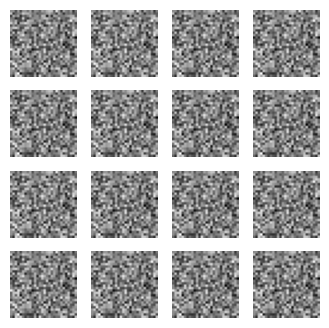

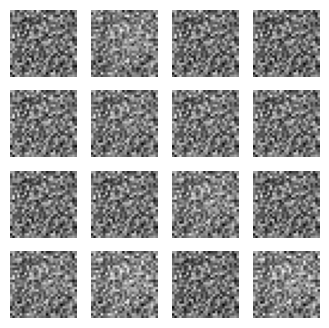

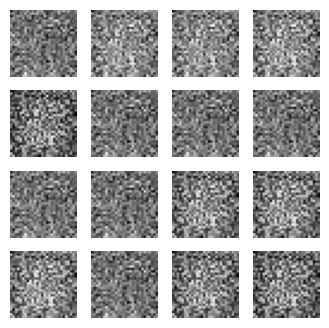

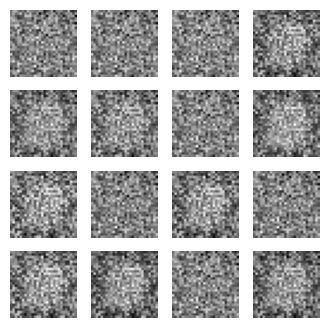

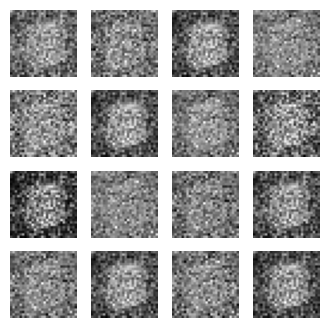

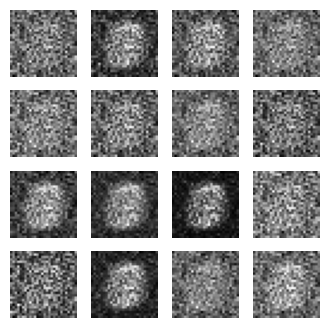

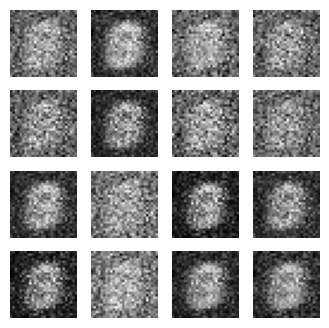

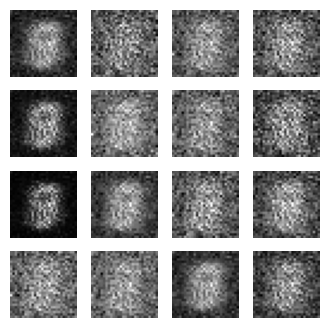

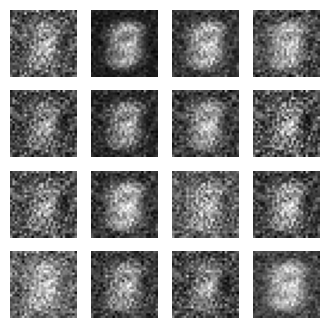

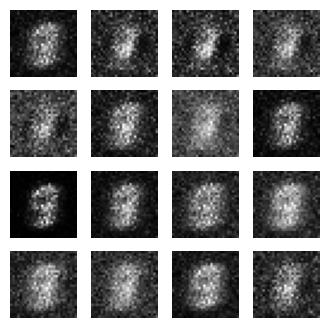

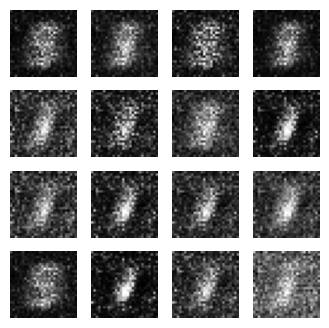

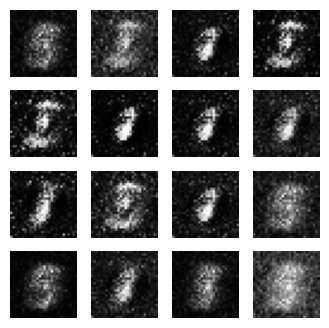

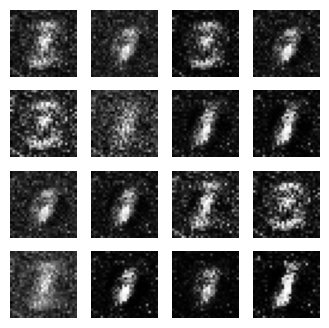

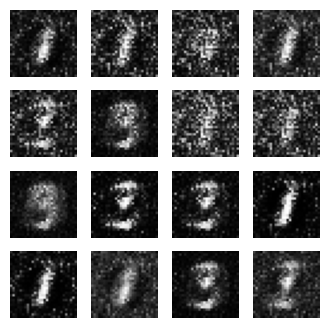

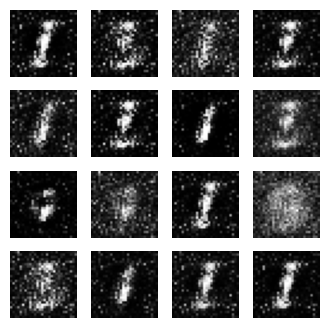

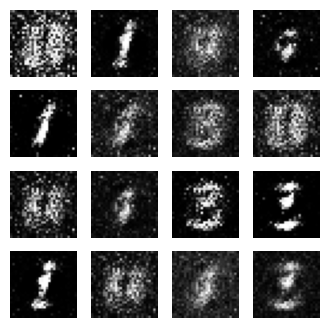

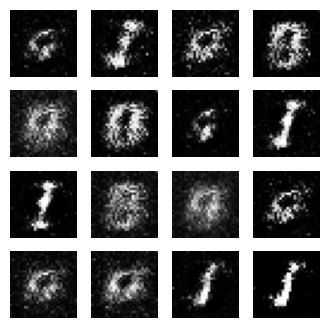

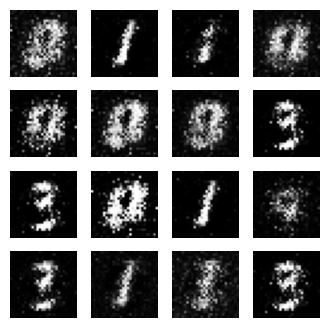

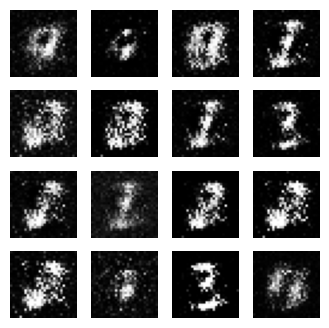

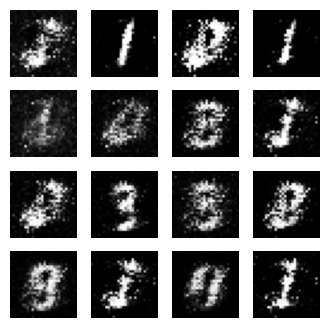

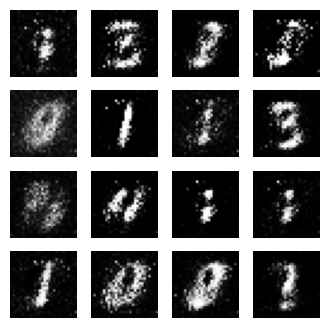

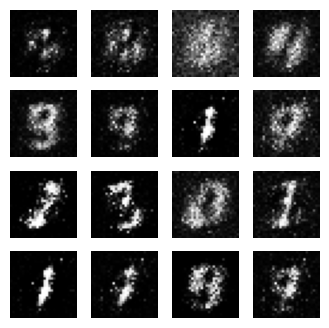

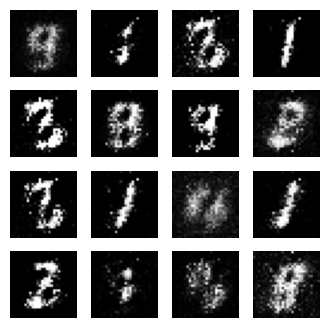

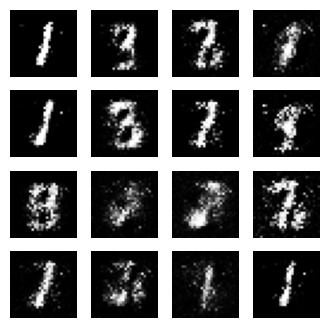

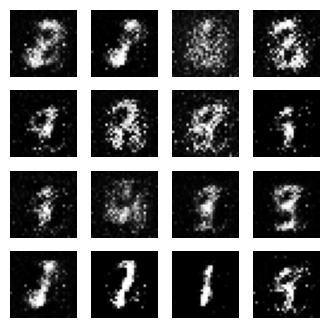

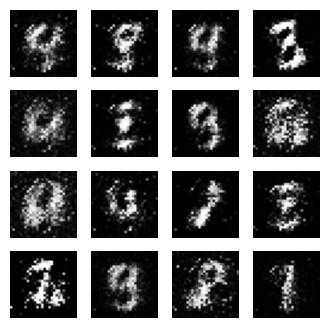

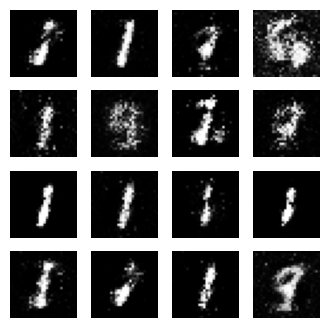

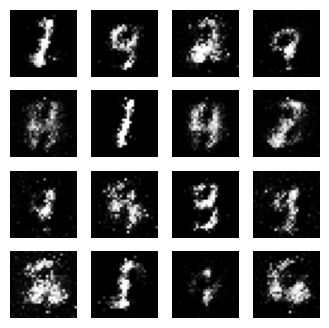

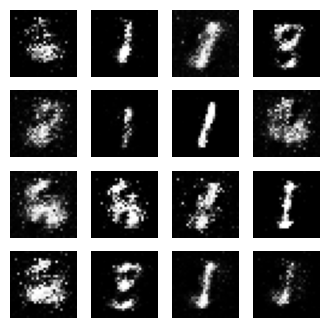

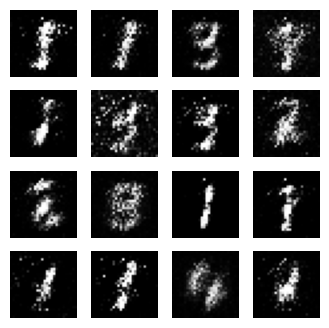

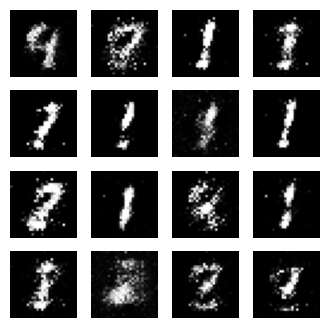

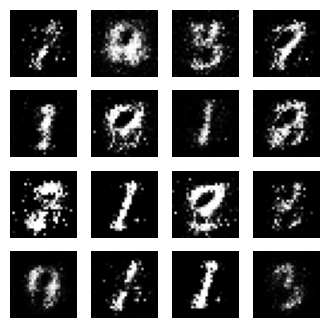

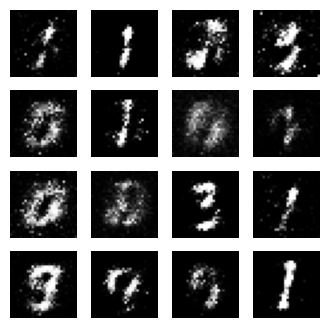

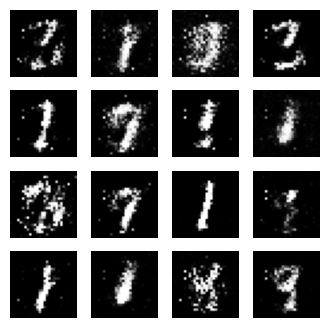

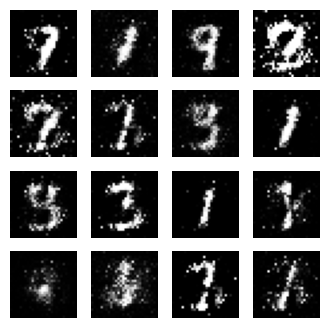

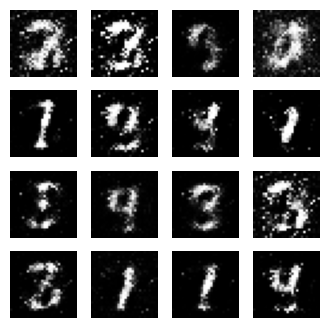

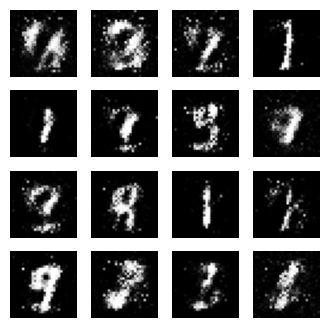

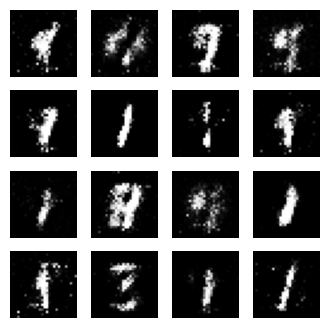

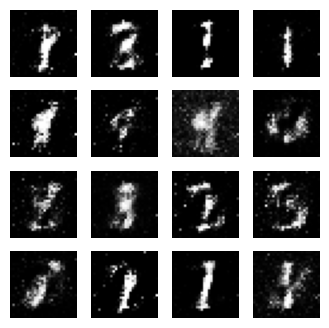

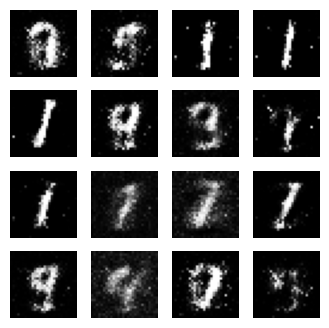

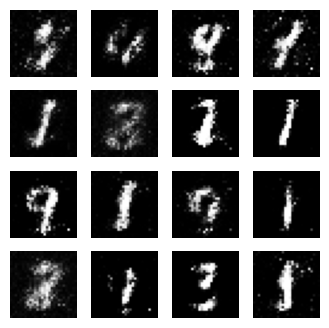

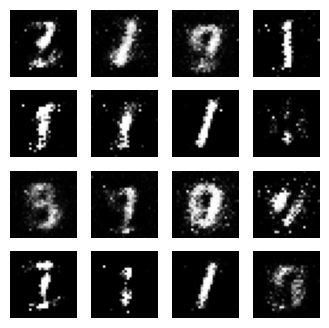

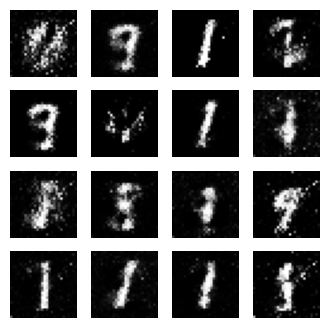

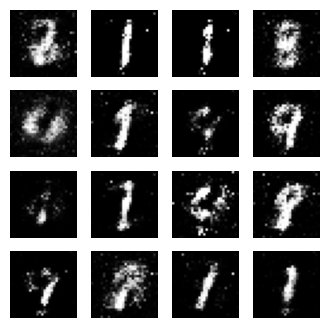

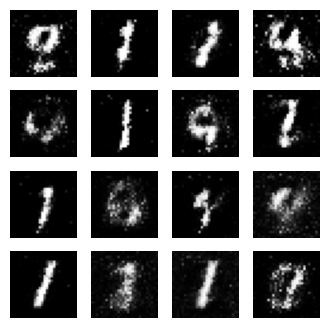

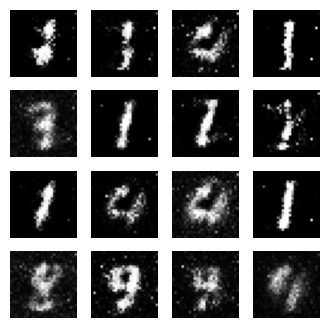

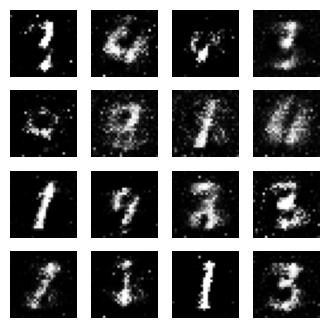

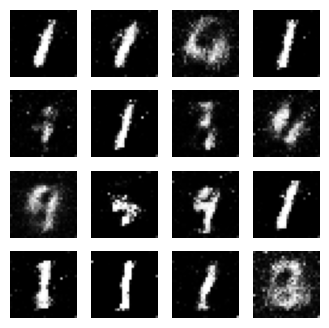

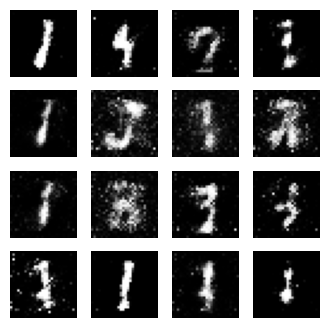

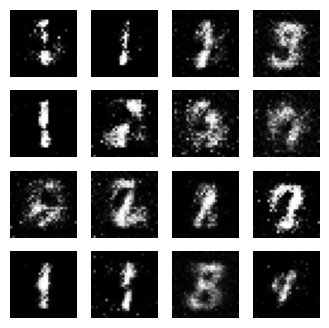

In [ ]:
train(5000, 128, 100)